### Dimension reduction using PCA

We need to calculate projections $\tilde{x_n}$ of original data points $x_n$ into a lower dimensional space. Our dataset $\chi = \{x_1, x_2, ..., x_N\}, x_n \in \rm{R}^D$

$\bar{x} = \frac{1}{N} \sum_{n=1}^N x_n$ 

$cov = \frac{1}{N} \sum_{n=1}^N (x_n - \bar{x})(x_n - \bar{x})^T$ 

We need to find a low-dimensional representation: 

$z_n = B^T x_n \in \rm{R}^M$ where projection matrix $B = [b_1, b_2, ..., b_M] \in \rm{R}^{D\times M}$

We assume columns of B are orthonormal: $b_i^Tb_j = 0$ if $i\neq j$ and $b_i^Tbi = 1$ 

We seek an M-dimensional subspace $U \subseteq \rm{R}^D, dim(U) = M < D$

We have to find a $B$ for which the $|x_n-\tilde{x}_n|^2$ loss is minimum. 

$z = B^T x$ and $\tilde{x} = B z$

Dataset is available at <http://yann.lecun.com/exdb/mnist/>

In [1]:
# Load necessary packages  
import io, gzip 
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# load images
def mnist_images(url):  
    with gzip.open(io.BytesIO(urlopen(url).read()), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        # consult http://yann.lecun.com/exdb/mnist/ for details 
    data = data.reshape(-1,784)
    return data/256  # we are using int8, squared distance could be large

# load image labels
def mnist_labels(url):        
    with gzip.open(io.BytesIO(urlopen(url).read()), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# plot/view a specific image
def mnist_view(im):
    plt.axis('off')
    plt.imshow(im.reshape((28,28)), cmap=plt.cm.gray, origin='upper')
    plt.show()
    return

# calculate squared distance
def dist(x1, x2):
    return np.sum(np.square(x1-x2))

# find nearest neighbor 
def find_nn(x):
    dist_vec = [dist(x, train_data[i,]) for i in range(len(train_labels))]
    print("Index: ", np.argmin(dist_vec))
    return train_labels[np.argmin(dist_vec)]

In [3]:
train_data = mnist_images('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/train-images-idx3-ubyte.gz')
test_data    = mnist_images('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/t10k-images-idx3-ubyte.gz')
train_labels = mnist_labels('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/train-labels-idx1-ubyte.gz')
test_labels  = mnist_labels('https://pranabdas.github.io/drive/datasets/mnist-handwritten-digits/t10k-labels-idx1-ubyte.gz')

In [4]:
# Compute covariance matrix
Sigma = np.cov(train_data, rowvar=0, bias=1)

# Compute coordinate-wise variances, in increasing order
coordinate_variances = np.sort(Sigma.diagonal())

# Compute variances in eigenvector directions, in increasing order
eigenvector_variances = np.sort(np.linalg.eigvalsh(Sigma))

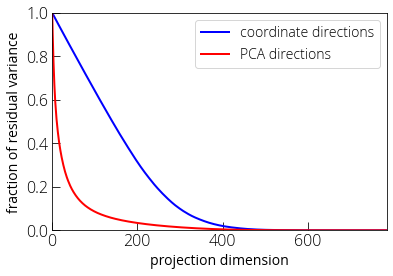

In [5]:
# Compute fraction of overall variance lost when projecting to k coordinate directions
total_coordinate_variance = np.cumsum(coordinate_variances)
total_coordinate_variance = total_coordinate_variance/total_coordinate_variance[783]

# Compute fraction of overall variance lost when projecting to k eigenvector directions
total_eigenvector_variance = np.cumsum(eigenvector_variances)
total_eigenvector_variance = total_eigenvector_variance/total_eigenvector_variance[783]

# Plot these results
plt.plot(np.arange(1,784), total_coordinate_variance[784:0:-1], 'b-', lw=2)
plt.plot(np.arange(1,784), total_eigenvector_variance[784:0:-1], 'r-', lw=2)
plt.xlabel('projection dimension', fontsize=14)
plt.ylabel('fraction of residual variance', fontsize=14)
plt.xlim(0,784)
plt.ylim(0.0,1.0)
plt.legend(['coordinate directions', 'PCA directions'], fontsize=14)
plt.show()

In [6]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [7]:
# Function that returns the project-and-reconstruct operations as a single matrix
def projection_and_reconstruction(k):
    U = eigenvectors[:,(784-k):784]
    P = np.dot(U,U.T)
    return P

In [8]:
def show_digit(x):
    # Make sure all entries of x are in the range [0,255]
    for i in range(784):
        x[i] = max(0.0, x[i])
        x[i] = min(255.0, x[i])
    # Now display
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

In [9]:
def show_effect_of_PCA(x, k_list):
    print("Original:")
    show_digit(x)
    for k in k_list:
        if (k > 0) and (k < 784):
            print("Projection to dimension ", k)
            P = projection_and_reconstruction(k)
            show_digit(P.dot(x))

Original:


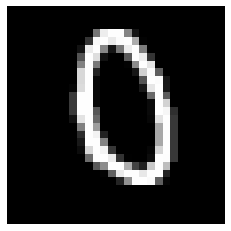

Projection to dimension  100


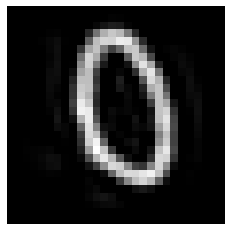

Projection to dimension  50


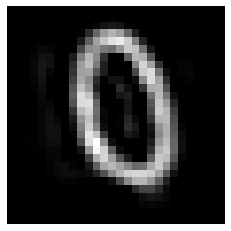

Projection to dimension  25


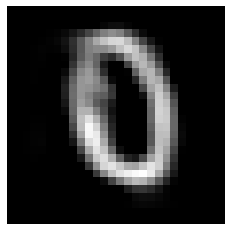

Projection to dimension  10


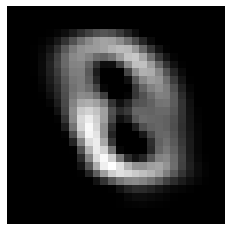

In [10]:
index = 1000
show_effect_of_PCA(train_data[index,], [100, 50, 25, 10])